In [32]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [45]:
dataset_path="C:\\Users\\Mayuri\\OneDrive\\Desktop\\DL\\Pneumonia_X_Ray"
img_width, img_height=150, 150

Preprocessing with ImageDataGenerator

In [46]:
datagen=ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2)

In [48]:
train_data=datagen.flow_from_directory(
    os.path.join(dataset_path,'train'),
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode='binary',
    subset='training',
)

Found 1632 images belonging to 2 classes.


In [47]:
val_data=datagen.flow_from_directory(
    os.path.join(dataset_path,'train'),
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

Found 408 images belonging to 2 classes.


In [49]:
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(img_width,img_height,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
     MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

In [50]:
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [52]:
history=model.fit(train_data,validation_data=val_data,epochs=10)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8254 - loss: 0.6128 - val_accuracy: 0.9559 - val_loss: 0.1284
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.9485 - loss: 0.1284 - val_accuracy: 0.9706 - val_loss: 0.0936
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9686 - loss: 0.0847 - val_accuracy: 0.9681 - val_loss: 0.1080
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9583 - loss: 0.1021 - val_accuracy: 0.9583 - val_loss: 0.1022
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9752 - loss: 0.0719 - val_accuracy: 0.9779 - val_loss: 0.0822
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9814 - loss: 0.0579 - val_accuracy: 0.9632 - val_loss: 0.1161
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9861 - loss: 0.0450 - val_accuracy: 0.9706 - val_loss: 0.0923
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9763 - loss: 0.0608 - val_accuracy: 0.9681 - val_loss:

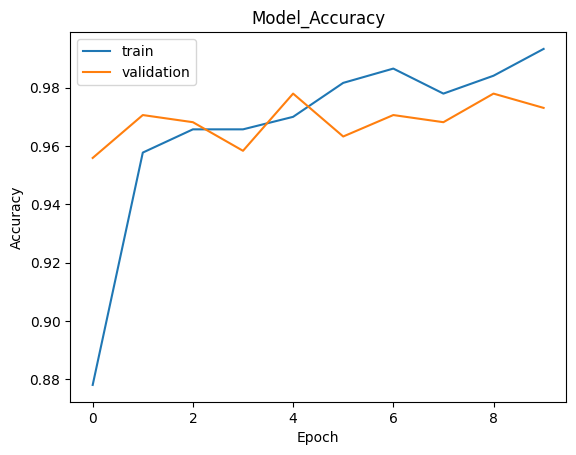

In [53]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.title("Model_Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
test_loss,test_acc=model.evaluate(val_data)
print("Validation Loss:",test_loss)
print("Validation Accuracy:",test_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9651 - loss: 0.1616
Validation Loss: 0.13350312411785126
Validation Accuracy: 0.9730392098426819


In [55]:
def predict_brain_tumor(img_path):
    img=load_img(img_path,target_size=(img_width,img_height))
    img_array=img_to_array(img)/255.0
    img_array=np.expand_dims(img_array,axis=0)
    prediction=model.predict(img_array)
    if prediction[0]>0.5:
        print("Pneumonia Detected")
    else:
        print("No Pneumonia Detected")
predict_brain_tumor("C:\\Users\\Mayuri\\OneDrive\\Desktop\\DL\\Pneumonia_X_Ray\\train\\PNEUMONIA\\person3_bacteria_11.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Pneumonia Detected


In [30]:
def predict_brain_tumor(img_path):
    img=load_img(img_path,target_size=(img_width,img_height))
    img_array=img_to_array(img)/255.0
    img_array=np.expand_dims(img_array,axis=0)
    prediction=model.predict(img_array)
    if prediction[0]>0.5:
        print("Pneumonia Detected")
    else:
        print("No Pneumonia Detected")
predict_brain_tumor("C:\\Users\\Mayuri\\OneDrive\\Desktop\\DL\\Pneumonia_X_Ray\\train\\NORMAL\\NORMAL2-IM-0653-0001.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
No Pneumonia Detected
